In [2]:
%matplotlib inline
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Read data from wandb api or alternatively from text file

API key must be set up in command line using
$ wandb login

In [2]:
api = wandb.Api()
data= api.run("jer2ig/YOLOv5/3gyxq19k")

In [7]:
print(data.history().columns)

Index(['x/lr1', 'metrics/precision', 'x/lr2', '_step', 'val/box_loss',
       'Labels', 'train/obj_loss', 'val/obj_loss', '_runtime',
       'train/cls_loss', 'metrics/mAP_0.5:0.95', 'metrics/mAP_0.5',
       'metrics/recall', 'x/lr0', 'train/box_loss', 'val/cls_loss',
       '_timestamp', 'Mosaics', 'BoundingBoxDebugger', 'Results',
       'Validation'],
      dtype='object')


C:\Users\Julius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Julius\AppData\Local\Temp/ipykernel_11284/2647966886.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


2720


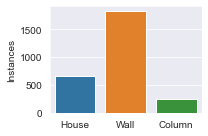

In [3]:
names = ["House", "Wall", "Column"]
counts = np.array([655, 1819, 246])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.set_ylabel("Instances")

sns.barplot(names, counts, ax=ax)

fig.tight_layout()
fig.show()
fig.savefig('label_count_buildings.pdf', bbox_inches='tight')
print(sum(counts))

In [66]:
pr = np.loadtxt('DamBaseline/PR_data.txt')
p = np.loadtxt('DamBaseline/P_data.txt')
r = np.loadtxt('DamBaseline/R_data.txt')
x = np.linspace(0,1,1000)

In [67]:
p

array([[0.05739972, 0.05740087, 0.08220089, ..., 1.        , 1.        ,
        1.        ],
       [0.03411633, 0.03413533, 0.05239524, ..., 1.        , 1.        ,
        1.        ],
       [0.05400563, 0.05403653, 0.07725246, ..., 1.        , 1.        ,
        1.        ],
       [0.04993017, 0.04994084, 0.07528579, ..., 1.        , 1.        ,
        1.        ],
       [0.05432596, 0.05432596, 0.0843509 , ..., 1.        , 1.        ,
        1.        ]])

C:\Users\Julius\AppData\Local\Temp/ipykernel_22348/1809432049.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


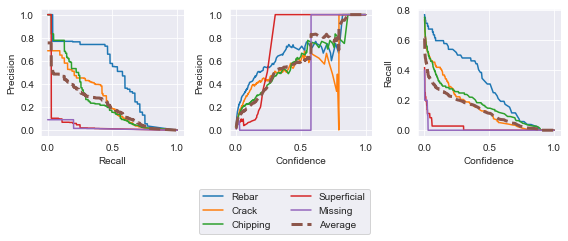

In [65]:
fig, ax = plt.subplots(1, 3,sharex= 'col', figsize=(8,2.5))


sns.lineplot(x=x, y=pr[0],legend=None, ax=ax[0])
sns.lineplot(x=x, y=pr[1],legend=None, ax=ax[0])
sns.lineplot(x=x, y=pr[2],legend=None, ax=ax[0])
sns.lineplot(x=x, y=pr[3],legend=None, ax=ax[0])
sns.lineplot(x=x, y=pr[4],legend=None, ax=ax[0])
sns.lineplot(x=x, y=pr.mean(0),legend=None, ax=ax[0], linewidth=3, linestyle='--')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')

sns.lineplot(x=x, y=p[0],legend=None, ax=ax[1])
sns.lineplot(x=x, y=p[1],legend=None, ax=ax[1])
sns.lineplot(x=x, y=p[2],legend=None, ax=ax[1])
sns.lineplot(x=x, y=p[3],legend=None, ax=ax[1])
sns.lineplot(x=x, y=p[4],legend=None, ax=ax[1])
sns.lineplot(x=x, y=p.mean(0),legend=None, ax=ax[1], linewidth=3, linestyle='--')
ax[1].set_xlabel('Confidence')
ax[1].set_ylabel('Precision')

sns.lineplot(x=x, y=r[0],legend=None, ax=ax[2])
sns.lineplot(x=x, y=r[1],legend=None, ax=ax[2])
sns.lineplot(x=x, y=r[2],legend=None, ax=ax[2])
sns.lineplot(x=x, y=r[3],legend=None, ax=ax[2])
sns.lineplot(x=x, y=r[4],legend=None, ax=ax[2])
sns.lineplot(x=x, y=r.mean(0),legend=None, ax=ax[2], linewidth=3, linestyle='--')
ax[2].set_xlabel('Confidence')
ax[2].set_ylabel('Recall')
fig.legend(labels=["Rebar","Crack","Chipping", "Superficial", "Missing", "Average"],loc='lower center', bbox_to_anchor=(0.5, -0.35), bbox_transform=plt.gcf().transFigure, ncol=2)
fig.tight_layout()
#fig.legend(labels=["Training","Testing"],loc='lower center', bbox_to_anchor=(0.5, -0.2), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('prelimd_pr.pdf', bbox_inches='tight')

C:\Users\Julius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Julius\AppData\Local\Temp/ipykernel_11284/691882671.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


4407


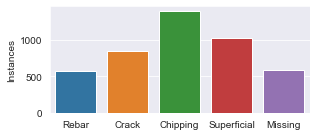

In [4]:
names = ["Rebar", "Crack", "Chipping", "Superficial", "Missing"]
counts = np.array([573, 847, 1385, 1017, 585])

fig, ax = plt.subplots(1, 1, figsize=(4.5, 2))
ax.set_ylabel("Instances")

sns.barplot(names, counts, ax=ax)

fig.tight_layout()
fig.show()
fig.savefig('label_count_dam.pdf', bbox_inches='tight')
print(sum(counts))

C:\Users\Julius\AppData\Local\Temp/ipykernel_22348/467530061.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


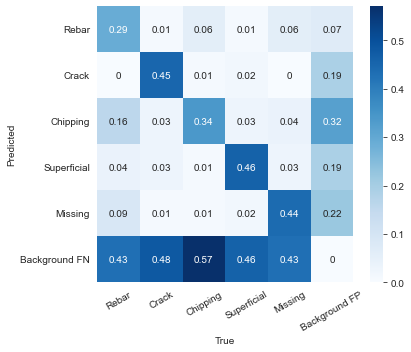

In [82]:
confusion = [[0.29, 0.01, 0.06, 0.01, 0.06, 0.07],
             [0,0.45, 0.01, 0.02,0, 0.19],
             [0.16, 0.03,0.34,0.03,0.04, 0.32],
             [0.04,0.03,0.01,0.46, 0.03, 0.19],
             [0.09,0.01,0.01,0.02,0.44,0.22],
             [0.43,0.48,0.57,0.46, 0.43,0]]
confusion = np.array(confusion)
x = ["Rebar", "Crack", "Chipping", "Superficial", "Missing","Background FP"]
y = ["Rebar", "Crack", "Chipping", "Superficial", "Missing","Background FN"]

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.heatmap(confusion, xticklabels=x, yticklabels=y,annot=True, cmap='Blues')
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
fig.tight_layout()
fig.show()
fig.savefig('damb_confusion.pdf', bbox_inches='tight')
